<a href="https://colab.research.google.com/github/mrdbourke/zero-to-mastery-ml/blob/wip/end-to-end-dog-vision-video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  end_to_end_COVID_19_Diagnosis

This notebook builds an end-to-end COVID-19 model to detect infected people using their CT scans

## 1. Problem

Identifying infected COVID-19 patients.



## 2. Data

The data we're using is from COVID-CT-Dataset: A CT Scan Dataset about COVID-19 availavle at paperswithcode

https://paperswithcode.com/paper/covid-ct-dataset-a-ct-scan-dataset-about#code

## 3. Evaluation

The evaluation is calculating the accuracy


## 4. Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* It is a binay classification problem, either positive or negative
* There are around 320 positive COVID-19 images in the training set (with or without labels).And There are around 141 negative COVID-19 images in the training set (with or without labels)



In [0]:
# Unzip the uploaded data into Google Drive
!unzip "drive/My Drive/COVID_19/images.zip" -d "drive/My Drive/COVID_19"

### Get our workspace ready

* Import TensorFlow 2.x ✅
* Import TensorFlow Hub ✅
* Make sure we're using a GPU ✅

In [0]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub 
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.2.0-rc2
TF Hub version: 0.7.0
GPU available (YESSSS!!!!!)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

Let's start by accessing our data and checking out the labels.

In [0]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/COVID_19/data/covid_data.csv")
print(labels_csv.describe())
print(labels_csv .head())

          lable     State
count       543       543
unique      543         2
top     956.png  negative
freq          1       292
    lable     State
0  14.png  negative
1  15.png  negative
2  33.png  negative
3  43.png  negative
4  44.png  negative


In [0]:
labels_csv

lable     State
0                                14.png  negative
1                                15.png  negative
2                                33.png  negative
3                                43.png  negative
4                                44.png  negative
..                                  ...       ...
538  2020.03.22.20040782-p24-1533-5.png   postive
539  2020.03.22.20040782-p24-1533-6.png   postive
540  2020.03.22.20040782-p24-1533-7.png   postive
541  2020.03.22.20040782-p24-1533-8.png   postive
542    2020.03.22.20040782-p25-1541.png   postive

[543 rows x 2 columns]

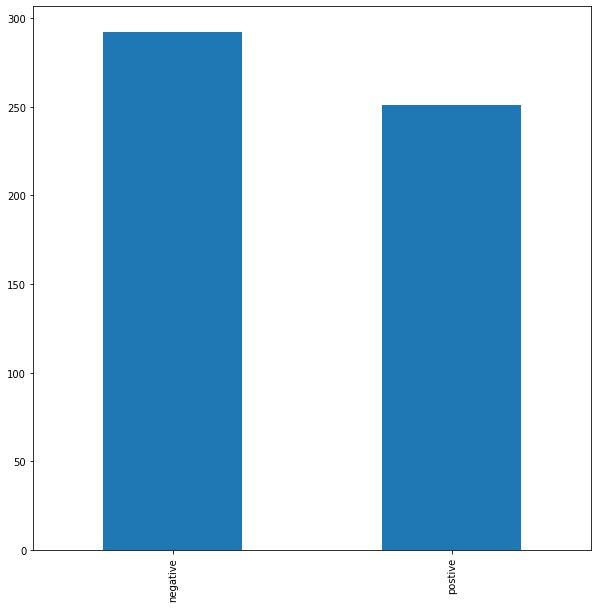

In [0]:
# How many images are there ?
labels_csv["State"].value_counts().plot.bar(figsize=(10, 10))

In [0]:
# What's the median number of images per class?
labels_csv["State"].value_counts().median()

271.5

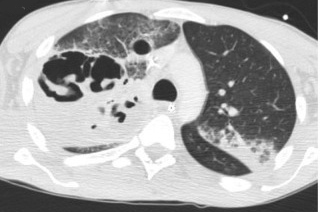

In [0]:
# Let's view an image
from IPython.display import Image
Image("drive/My Drive/COVID_19/images/43%2.png")

### Getting images and their labels 

Let's get a list of all of our image file pathnames.

In [0]:
labels_csv.head()

lable     State
0  14.png  negative
1  15.png  negative
2  33.png  negative
3  43.png  negative
4  44.png  negative

In [0]:
# Create pathnames from image ID's
filenames = ["drive/My Drive/COVID_19/images/" +fname for fname in labels_csv["lable"]]

# Check the first 10
len(filenames)

543

In [0]:
filenames[10:300]

['drive/My Drive/COVID_19/images/104.png',
 'drive/My Drive/COVID_19/images/114.png',
 'drive/My Drive/COVID_19/images/115.png',
 'drive/My Drive/COVID_19/images/116.png',
 'drive/My Drive/COVID_19/images/117.png',
 'drive/My Drive/COVID_19/images/118.png',
 'drive/My Drive/COVID_19/images/120.png',
 'drive/My Drive/COVID_19/images/158.png',
 'drive/My Drive/COVID_19/images/171.png',
 'drive/My Drive/COVID_19/images/174.png',
 'drive/My Drive/COVID_19/images/226.png',
 'drive/My Drive/COVID_19/images/227.png',
 'drive/My Drive/COVID_19/images/294.png',
 'drive/My Drive/COVID_19/images/354.png',
 'drive/My Drive/COVID_19/images/361.png',
 'drive/My Drive/COVID_19/images/378.png',
 'drive/My Drive/COVID_19/images/381.png',
 'drive/My Drive/COVID_19/images/382.png',
 'drive/My Drive/COVID_19/images/383.png',
 'drive/My Drive/COVID_19/images/385.png',
 'drive/My Drive/COVID_19/images/575.png',
 'drive/My Drive/COVID_19/images/576.png',
 'drive/My Drive/COVID_19/images/577.png',
 'drive/My 

In [0]:
import os
len(os.listdir("drive/My Drive/COVID_19/images"))

746

In [0]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/My Drive/COVID_19/images/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do no match actual amount of files, check the target directory.")

Filenames do no match actual amount of files, check the target directory.


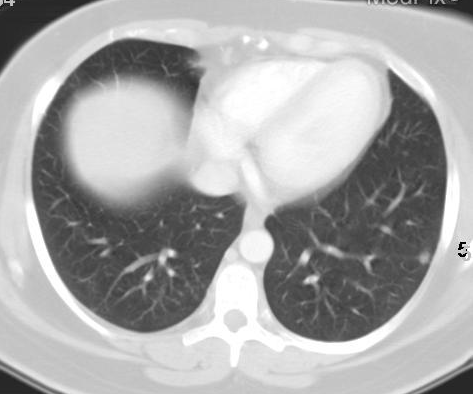

In [0]:
# One more check
Image(filenames[20])

In [0]:
labels_csv["State"][300]

'postive'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [0]:
import numpy as np
labels = labels_csv["State"].to_numpy() 
# labels = np.array(labels) # does same thing as above
labels

array(['negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negati

In [0]:
len(labels)

543

In [0]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories!")

Number of labels matches number of filenames!


In [0]:
# Find the unique label values
unique_State = np.unique(labels)
len(unique_State)

2

In [0]:
unique_State

array(['negative', 'postive'], dtype=object)

In [0]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_State

negative


array([ True, False])

In [0]:
len(labels)

543

In [0]:
# Turn every label into a boolean array
boolean_labels = [label == unique_State for label in labels]
boolean_labels

[array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, F

In [0]:
len(boolean_labels)

543

In [0]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_State == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

negative
(array([0]),)
0
[1 0]


In [0]:
print(labels[2])
print(boolean_labels[2].astype(int))

negative
[1 0]


In [0]:
boolean_labels[:2]

[array([ True, False]), array([ True, False])]

In [0]:
filenames[:10]

['drive/My Drive/COVID_19/images/14.png',
 'drive/My Drive/COVID_19/images/15.png',
 'drive/My Drive/COVID_19/images/33.png',
 'drive/My Drive/COVID_19/images/43.png',
 'drive/My Drive/COVID_19/images/44.png',
 'drive/My Drive/COVID_19/images/59.png',
 'drive/My Drive/COVID_19/images/81.png',
 'drive/My Drive/COVID_19/images/82.png',
 'drive/My Drive/COVID_19/images/102.png',
 'drive/My Drive/COVID_19/images/103.png']

### Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [0]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [0]:
len(filenames)

543

In [0]:
len(boolean_labels)

543

We're going to start off experimenting with ~1000 images and increase as needed.

In [0]:
# Set number of images to use for experimenting
NUM_IMAGES = 543 #@param {type:"slider", min:100, max:543, step:100}

In [0]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(434, 434, 109, 109)

In [0]:
# Let's have a geez at the training data
X_train[:5], y_train[:2]

(['drive/My Drive/COVID_19/images/2020.02.22.20024927-p19-68%0.png',
  'drive/My Drive/COVID_19/images/65%4.png',
  'drive/My Drive/COVID_19/images/88.png',
  'drive/My Drive/COVID_19/images/2020.03.22.20040782-p25-1541.png',
  'drive/My Drive/COVID_19/images/2020.02.26.20027938-p6-80_3%1.png'],
 [array([False,  True]), array([ True, False])])

## Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

Before we do, let's see what importing an image looks like.

In [0]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[1])
image.shape

(363, 491, 3)

In [0]:
image.max(), image.min()

(1.0, 0.0)

In [0]:
image[:2]

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]]], dtype=float32)

In [0]:
# turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 491, 3), dtype=float32, numpy=
array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]]], dtype=float32)>

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

We'll create a function to:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

More information on loading images in TensorFlow can be seen here: https://www.tensorflow.org/tutorials/load_data/images

In [0]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: 
`(image, label)`.

In [0]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [0]:
# Demo of the above
(process_image(X[3]), tf.constant(y[3]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], 

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (`X` & `y`) into batches!

In [0]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 4

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [0]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [0]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!

In [0]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_4_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(4):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(4, 4, i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_State[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [0]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 2)), types: (tf.float32, tf.bool)>

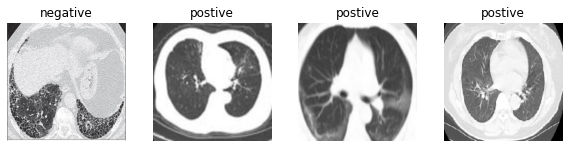

In [0]:
# # Now let's visualize the data in a training batch
 train_images, train_labels = next(train_data.as_numpy_iterator())
show_4_images(train_images, train_labels)

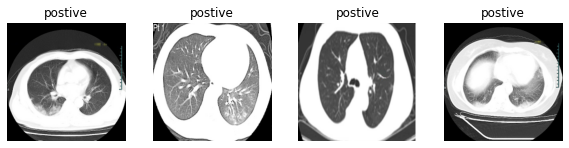

In [0]:
# # Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_4_images(val_images, val_labels)

## Building a model

Before we build a model, there are a few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [0]:
IMG_SIZE

224

In [0]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_State)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [0]:
INPUT_SHAPE

[None, 224, 224, 3]

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

All of these steps can be found here: https://www.tensorflow.org/guide/keras/overview

In [0]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="sigmoid") # Layer 2 (output layer)#softmax
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.BinaryCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(), #must change
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [0]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  2004      
Total params: 5,434,717
Trainable params: 2,004
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

### TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension ✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function. ✅
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training).

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [0]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [0]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/COVID_19/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [0]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [0]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [0]:
# Check to make sure we're still running on a GPU
print("GPU", "available (YESSS!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSS!!!!!!)


Let's create a function which trains a model.

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use
* Return the model

In [0]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [0]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
  2/109 [..............................] - ETA: 21s - loss: 1.0561 - accuracy: 0.3750WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.189370). Check your callbacks.


109/109 [==============================] - 6s 55ms/step - loss: 0.6625 - accuracy: 0.6498 - val_loss: 0.5211 - val_accuracy: 0.7982
Epoch 2/100
109/109 [==============================] - 5s 46ms/step - loss: 0.4408 - accuracy: 0.8111 - val_loss: 0.4798 - val_accuracy: 0.7890
Epoch 3/100
109/109 [==============================] - 5s 46ms/step - loss: 0.3794 - accuracy: 0.8387 - val_loss: 0.4211 - val_accuracy: 0.8257
Epoch 4/100
109/109 [==============================] - 5s 47ms/step - loss: 0.3456 - accuracy: 0.8618 - val_loss: 0.4398 - val_accuracy: 0.7706
Epoch 5/100
109/109 [==============================] - 5s 46ms/step - loss: 0.3030 - accuracy: 0.8641 - val_loss: 0.4244 - val_accuracy: 0.8257
Epoch 6/100
109/109 [==============================] - 5s 46ms/step - loss: 0.2725 - accuracy: 0.8940 - val_loss: 0.4542 - val_accuracy: 0.7982


### Checking the TensorBoard logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize its contents.

In [0]:
%tensorboard --logdir drive/My\ Drive/COVID_19/logs

Output hidden; open in https://colab.research.google.com to view.

## Making and evaluating predictions using a trained model 

In [0]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 2)), types: (tf.float32, tf.bool)>

In [0]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

In [0]:
predictions[0]

array([0.27034792, 0.46849364], dtype=float32)

In [0]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_State[np.argmax(predictions[index])]}")

[0.9067323  0.03033498]
Max value (probability of prediction): 0.9067323207855225
Sum: 0.9370672702789307
Max index: 0
Predicted label: negative


In [0]:
unique_State[1]

'postive'

Having the the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on!

**Note:** Prediction probabilities are also known as confidence levels.

In [0]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_State[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'postive'

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [0]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 2)), types: (tf.float32, tf.bool)>

In [0]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_State[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[1], val_labels[1]

(array([[[1.5886512e-02, 1.5886512e-02, 1.5886512e-02],
         [2.0714067e-02, 2.0714067e-02, 2.0714067e-02],
         [2.5141150e-02, 2.5141150e-02, 2.5141150e-02],
         ...,
         [6.0470390e-01, 6.0470390e-01, 6.0470390e-01],
         [9.9630606e-01, 9.9630606e-01, 9.9630606e-01],
         [9.9442297e-01, 9.9442297e-01, 9.9442297e-01]],
 
        [[1.0090601e-02, 1.0090601e-02, 1.0090601e-02],
         [6.3988091e-03, 6.3988091e-03, 6.3988091e-03],
         [9.9768015e-03, 9.9768015e-03, 9.9768015e-03],
         ...,
         [6.2226236e-01, 6.2226236e-01, 6.2226236e-01],
         [9.9947155e-01, 9.9947155e-01, 9.9947155e-01],
         [9.9269629e-01, 9.9269629e-01, 9.9269629e-01]],
 
        [[9.4734756e-03, 9.4734756e-03, 9.4734756e-03],
         [1.8047530e-02, 1.8047530e-02, 1.8047530e-02],
         [3.6109021e-05, 3.6109021e-05, 3.6109021e-05],
         ...,
         [5.4128808e-01, 5.4128808e-01, 5.4128808e-01],
         [9.9471736e-01, 9.9471736e-01, 9.9471736e-01],


Now we've got ways to get get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some function to make these all a bit more visaulize.

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. ✅
* Convert the prediction probabilities to a predicted label. ✅
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. ✅

In [0]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

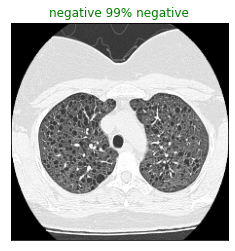

In [0]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer ✅
* Find the prediction using `get_pred_label()` ✅
* Find the top 10:
  * Prediction probabilities indexes ✅
  * Prediction probabilities values ✅
  * Prediction labels ✅
* Plot the top 10 prediction probability values and labels, coloring the true label green ✅

In [0]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_State[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

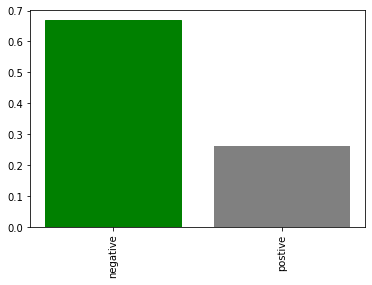

In [0]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some function to help us visualize our predictions and evaluate our modle, let's check out a few.

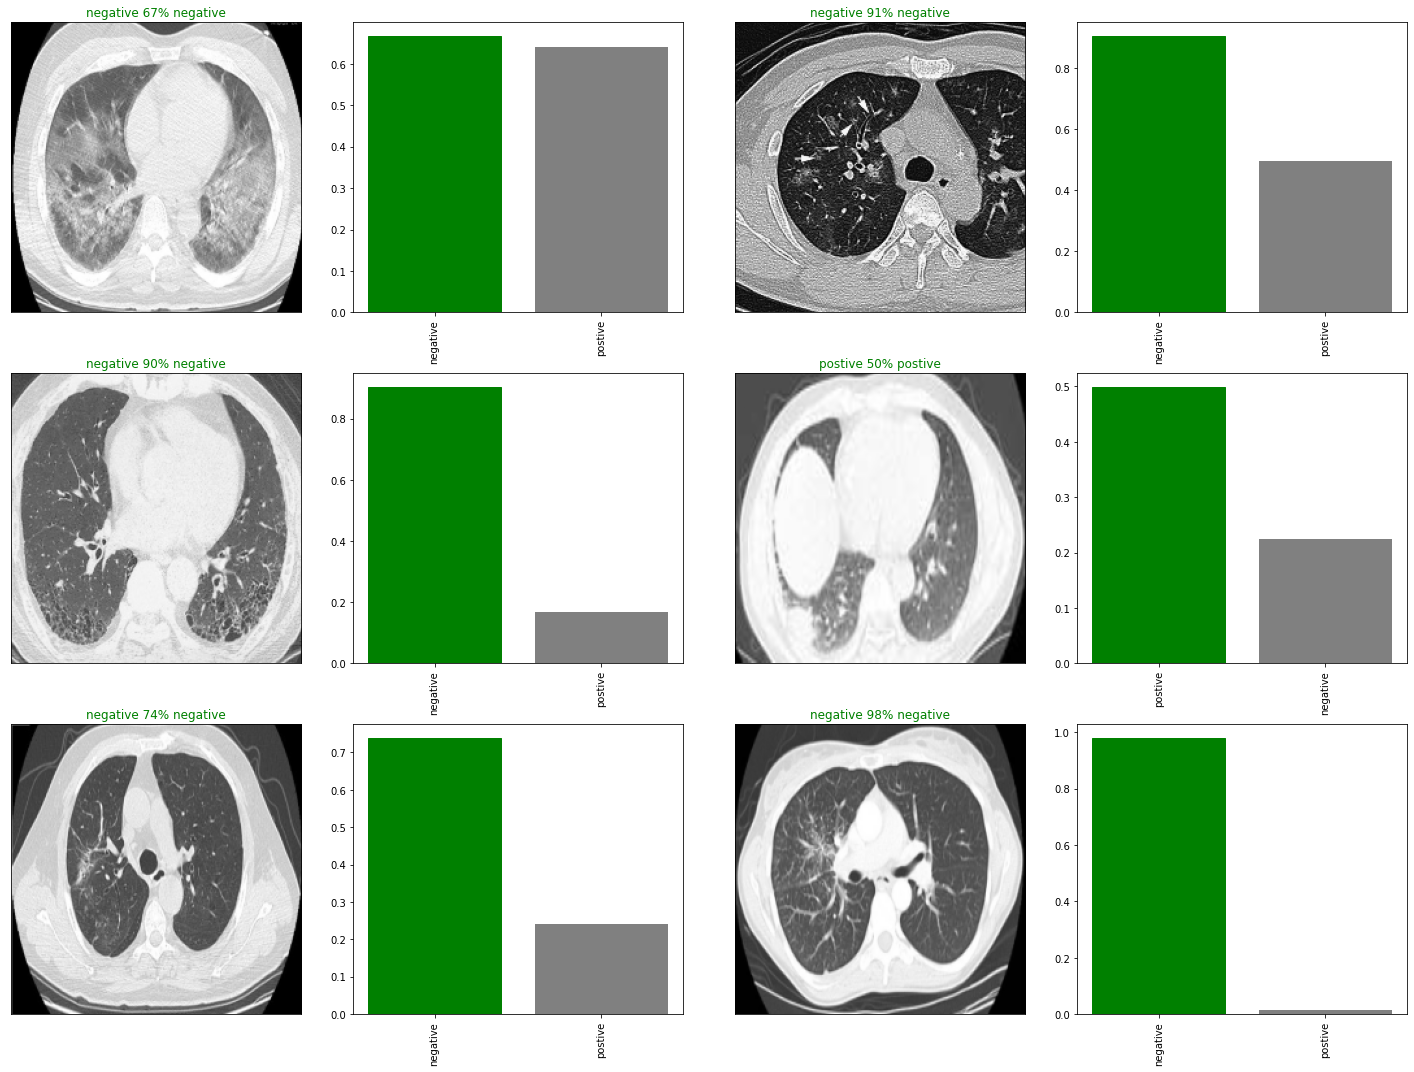

In [0]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

**Challenge:** How would you create a confusion matrix with our models predictions and true labels?

## Saving and reloading a trained model

In [0]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/COVID_19/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [0]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

Now we've got functions to save and load a trained model, let's make sure they work!

In [0]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/COVID_19/models/20200406-13141586178842-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/COVID_19/models/20200406-13141586178842-1000-images-mobilenetv2-Adam.h5'

In [0]:
# Load a trained model
loaded_1000_image_model = load_model('drive/My Drive/COVID_19/models/20200406-13111586178684-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/COVID_19/models/20200406-13111586178684-1000-images-mobilenetv2-Adam.h5


In [0]:
# Evaluate the pre-saved model
model.evaluate(val_data)

28/28 [==============================] - 1s 35ms/step - loss: 0.4542 - accuracy: 0.7982


[0.45421552658081055, 0.7981651425361633]

In [0]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

28/28 [==============================] - 1s 34ms/step - loss: 0.4542 - accuracy: 0.7982


[0.45421552658081055, 0.7981651425361633]

## Training (on the full data)

In [0]:
len(X), len(y)

(543, 543)

In [0]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches...


In [0]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 2)), types: (tf.float32, tf.bool)>

In [0]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

**Note:** Running the cell below will take a little while (maybe up to 30 minutes for the first epoch) because the GPU we're using in the runtime has to load all of the images into memory.

In [0]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
  2/136 [..............................] - ETA: 45s - loss: 1.0697 - accuracy: 0.2500WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.322479). Check your callbacks.


136/136 [==============================] - 6s 45ms/step - loss: 0.6567 - accuracy: 0.6575
Epoch 2/100
136/136 [==============================] - 5s 36ms/step - loss: 0.4371 - accuracy: 0.7974
Epoch 3/100
136/136 [==============================] - 5s 37ms/step - loss: 0.3685 - accuracy: 0.8471
Epoch 4/100
136/136 [==============================] - 5s 37ms/step - loss: 0.3329 - accuracy: 0.8656
Epoch 5/100
136/136 [==============================] - 5s 37ms/step - loss: 0.2986 - accuracy: 0.8895
Epoch 6/100
136/136 [==============================] - 5s 37ms/step - loss: 0.2801 - accuracy: 0.8913
Epoch 7/100
136/136 [==============================] - 5s 37ms/step - loss: 0.2690 - accuracy: 0.8895
Epoch 8/100
136/136 [==============================] - 5s 37ms/step - loss: 0.2318 - accuracy: 0.9098
Epoch 9/100
136/136 [==============================] - 5s 37ms/step - loss: 0.2081 - accuracy: 0.9355
Epoch 10/100
136/136 [==============================] - 5s 37ms/step - loss: 0.2056 - accuracy

In [0]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: drive/My Drive/COVID_19/models/20200406-13331586179983-full-image-set-mobilenetv2-Adam.h5...


'drive/My Drive/COVID_19/models/20200406-13331586179983-full-image-set-mobilenetv2-Adam.h5'

In [0]:
# Load in the full model
loaded_full_model = load_model('drive/My Drive/COVID_19/models/20200406-13111586178684-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/COVID_19/models/20200406-13111586178684-1000-images-mobilenetv2-Adam.h5


## Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames. ✅
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels). ✅
* Make a predictions array by passing the test batches to the `predict()` method called on our model. 

In [0]:
# Load test image filenames
test_path = "drive/My Drive/COVID_19/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames

['drive/My Drive/COVID_19/test/92331344_527919211481947_6077464545876508672_n.png']

In [0]:
len(test_filenames)

1

In [0]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [0]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [0]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

1/1 [==============================] - 0s 2ms/step


In [0]:
test_predictions

array([[0.04496589, 0.7269195 ]], dtype=float32)

In [0]:
test_predictions.shape

(1, 2)